## **Generate Protein Structure from Amino Acid Sequence**

In [ ]:
!pip install biopython pymol

ERROR: Could not find a version that satisfies the requirement pymol (from versions: none)
ERROR: No matching distribution found for pymol


In [ ]:
!pip install biopython py3Dmol


In [ ]:
import os
from Bio.PDB import PDBParser, PDBIO, Atom, Residue, Chain, Model, Structure
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import seq3
import py3Dmol

# Function to create a PDB file from an amino acid sequence
def create_pdb_from_sequence(sequence, pdb_file):
    # Create a Biopython SeqRecord
    seq_record = SeqRecord(Seq(sequence), id="Protein", description="Generated Protein Structure")

    # Create a Biopython structure from the SeqRecord
    pdb_structure = create_structure(seq_record)

    # Save the structure to a PDB file
    io = PDBIO()
    io.set_structure(pdb_structure)
    io.save(pdb_file)

# Function to create a Biopython structure from a SeqRecord
def create_structure(seq_record):
    # Create a new structure
    structure = Structure.Structure(seq_record.id)
    model = Model.Model(0)
    chain = Chain.Chain("A")

    # Create residues from the sequence
    for i, aa in enumerate(seq_record.seq):
        residue_name = seq3(aa)  # Convert to three-letter code
        residue = Residue.Residue((' ', i + 1, ' '), residue_name, '')
        # Add a dummy CA atom with the element explicitly specified
        atom = Atom.Atom('CA', [i * 1.5, 0.0, 0.0], 1.0, 1.0, ' ', 'CA', i + 1, element='C')
        residue.add(atom)
        chain.add(residue)

    # Add the chain to the model and the model to the structure
    model.add(chain)
    structure.add(model)

    return structure

# Function to visualize the structure using py3Dmol
def visualize_structure_with_py3dmol(pdb_file):
    with open(pdb_file, 'r') as pdb:
        pdb_data = pdb.read()

    viewer = py3Dmol.view(width=800, height=600)
    viewer.addModel(pdb_data, 'pdb')
    viewer.setStyle({'cartoon': {'color': 'spectrum'}})
    viewer.zoomTo()
    viewer.show()

# Main function
def main():
    # Example amino acid sequence (30+ amino acids)
    amino_acid_sequence = "MKTAYIAKQRQISFVKSHFSRQDILDLWIYHTQGYFPDWQNYFYSAS"

    # Generate PDB file from the sequence
    pdb_file = "generated_protein.pdb"
    create_pdb_from_sequence(amino_acid_sequence, pdb_file)

    # Visualize the generated structure using py3Dmol
    visualize_structure_with_py3dmol(pdb_file)

# Execute the main function
if __name__ == "__main__":
    main()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## **Fetching and Analyzing Protein Sequences from Databases**

In [ ]:
from Bio import SeqIO, Entrez

# Fetch protein sequence from NCBI
def fetch_protein_sequence(accession):
    Entrez.email = "your_email@example.com"  # Provide your email address
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    handle.close()
    return seq_record

accession = "YP_009724390.1"  # Example accession number
protein_seq_record = fetch_protein_sequence(accession)

# Print sequence and basic properties
print(f"Sequence ID: {protein_seq_record.id}")
print(f"Sequence Length: {len(protein_seq_record.seq)}")
print(f"Sequence: {protein_seq_record.seq}")


Sequence ID: YP_009724390.1
Sequence Length: 1273
Sequence: MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSS

## **Basics of Protein Structure and Sequence Analysis**

In [ ]:
pip install biopython

Protein Sequence from NCBI (Accession: YP_009724390.1):
MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASA

/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  warnings.warn(
/usr/local/lib/python3.10/di

Sequence from PDB (Chain 1, PDB ID: 1TUP):
SSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENL

Sequence from PDB (Chain 2, PDB ID: 1TUP):
SVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENL

Sequence from PDB (Chain 3, PDB ID: 1TUP):
SSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENL



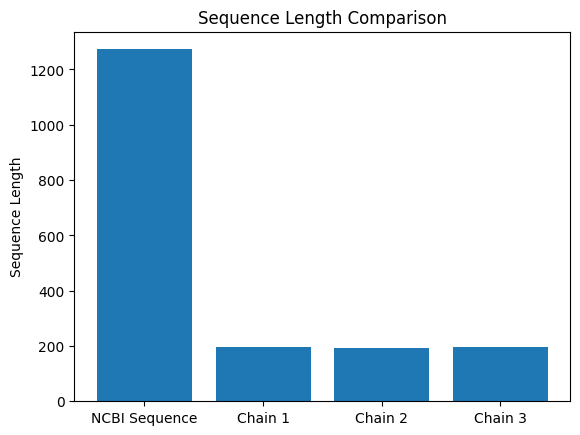

In [ ]:
from Bio import SeqIO, Entrez
from Bio.PDB import PDBParser, PDBList, PPBuilder
from Bio.SeqUtils import seq3
import matplotlib.pyplot as plt

# Function to fetch protein sequence from NCBI
def fetch_protein_sequence(accession):
    Entrez.email = "your_email@example.com"  # Always provide your email address
    handle = Entrez.efetch(db="protein", id=accession, rettype="fasta", retmode="text")
    seq_record = SeqIO.read(handle, "fasta")
    handle.close()
    return seq_record

# Function to download PDB file
def download_pdb_file(pdb_id):
    pdbl = PDBList()
    pdbl.retrieve_pdb_file(pdb_id, pdir='.', file_format='pdb')
    return f'pdb{pdb_id.lower()}.ent'

# Function to parse PDB file and extract sequence
def parse_pdb_file(file_path):
    parser = PDBParser(PERMISSIVE=1)
    structure = parser.get_structure('protein', file_path)
    ppb = PPBuilder()
    sequences = [pp.get_sequence() for pp in ppb.build_peptides(structure)]
    return sequences

# Function to plot sequence length comparison
def plot_sequence_lengths(protein_sequence, pdb_sequences):
    lengths = [len(protein_sequence)] + [len(seq) for seq in pdb_sequences]
    labels = ['NCBI Sequence'] + [f'Chain {i+1}' for i in range(len(pdb_sequences))]
    plt.bar(labels, lengths)
    plt.ylabel('Sequence Length')
    plt.title('Sequence Length Comparison')
    plt.show()

# Main function
def main():
    accession = "YP_009724390.1"  # Example protein accession number
    pdb_id = "1TUP"  # Example PDB ID (Tubulin)

    # Fetch protein sequence from NCBI
    protein_seq_record = fetch_protein_sequence(accession)
    print(f"Protein Sequence from NCBI (Accession: {accession}):\n{protein_seq_record.seq}\n")

    # Download and parse PDB file
    pdb_file = download_pdb_file(pdb_id)
    pdb_sequences = parse_pdb_file(pdb_file)
    for i, seq in enumerate(pdb_sequences):
        print(f"Sequence from PDB (Chain {i+1}, PDB ID: {pdb_id}):\n{seq}\n")

    # Plot sequence length comparison
    plot_sequence_lengths(protein_seq_record.seq, pdb_sequences)

if __name__ == "__main__":
    main()


## **Downloading and Visualizing Protein Structures**

In [ ]:
import nglview as nv
from Bio.PDB import PDBParser
import requests

def download_pdb_file(pdb_id):
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    response = requests.get(url)
    file_path = f'{pdb_id}.pdb'
    with open(file_path, 'w') as file:
        file.write(response.text)
    return file_path

def parse_and_view_pdb(file_path):
    parser = PDBParser()
    structure = parser.get_structure('protein', file_path)
    view = nv.show_biopython(structure)
    return view

pdb_id = "1TUP"  # Example PDB ID
pdb_file = download_pdb_file(pdb_id)
view = parse_and_view_pdb(pdb_file)
view


/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  warnings.warn(
/usr/local/lib/python3.10/di

NGLWidget()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
pip install biopython nglview

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.7 MB/s eta 0:00:00
Using cached

In [ ]:
from Bio.PDB import PDBParser
import nglview as nv
import requests

# Function to download PDB file
def download_pdb_file(pdb_id):
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    response = requests.get(url)
    file_path = f'{pdb_id}.pdb'
    with open(file_path, 'w') as file:
        file.write(response.text)
    return file_path

# Function to parse and view PDB file
def parse_and_view_pdb(file_path):
    parser = PDBParser()
    structure = parser.get_structure('protein', file_path)
    view = nv.show_biopython(structure)
    return view

# Main function
def main():
    pdb_id = "1TUP"  # Example PDB ID (Tubulin)

    # Download and parse PDB file
    pdb_file = download_pdb_file(pdb_id)

    # Visualize the protein structure
    view = parse_and_view_pdb(pdb_file)
    view.display()

if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  warnings.warn(
/usr/local/lib/python3.10/di

In [ ]:
import nglview as nv
from Bio.PDB import PDBParser
import requests

def download_pdb_file(pdb_id):
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    response = requests.get(url)
    file_path = f'{pdb_id}.pdb'
    with open(file_path, 'w') as file:
        file.write(response.text)
    return file_path

def parse_and_view_pdb(file_path):
    parser = PDBParser()
    structure = parser.get_structure('protein', file_path)
    view = nv.show_biopython(structure)
    return view

pdb_id = "1TUP"  # Example PDB ID (Tubulin)
pdb_file = download_pdb_file(pdb_id)
view = parse_and_view_pdb(pdb_file)
view


/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6185.
  warnings.warn(
/usr/local/lib/python3.10/di

NGLWidget()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

## **Visualizing Protein Structure**

In [ ]:
!pip install biopython nglview py3Dmol


In [ ]:
from Bio.PDB import PDBParser
import requests
import py3Dmol

# Function to download PDB file
def download_pdb_file(pdb_id):
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    response = requests.get(url)
    file_path = f'{pdb_id}.pdb'
    with open(file_path, 'w') as file:
        file.write(response.text)
    return file_path

# Function to parse and return PDB file content
def get_pdb_content(pdb_id):
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    response = requests.get(url)
    return response.text

# Function to visualize PDB file content using py3Dmol
def visualize_pdb_with_py3Dmol(pdb_content):
    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_content, 'pdb')
    view.setStyle({'cartoon': {'color': 'spectrum'}})
    view.zoomTo()
    return view

# Main function
def main():
    pdb_id = "1TUP"  # Example PDB ID (Tubulin)

    # Download and get PDB file content
    pdb_content = get_pdb_content(pdb_id)

    # Visualize the protein structure with py3Dmol
    view = visualize_pdb_with_py3Dmol(pdb_content)
    return view

# Execute the main function and display the view
view = main()
view.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## **Sequence Alignment**

In [ ]:
!apt-get install clustalw

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  clustalx seaview
The following NEW packages will be installed:
  clustalw
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 275 kB of archives.
After this operation, 818 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalw amd64 2.1+lgpl-7 [275 kB]
Fetched 275 kB in 1s (503 kB/s)
Selecting previously unselected package clustalw.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../clustalw_2.1+lgpl-7_amd64.deb ...
Unpacking clustalw (2.1+lgpl-7) ...
Setting up clustalw (2.1+lgpl-7) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import subprocess
from Bio import AlignIO

# Multiple hemoglobin sequences provided
hemoglobin_sequences = """>hemoglobin_human
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPK
VKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFG
KEFTPPVQAAYQKVVAGVANALAHKYH
>hemoglobin_chimpanzee
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFDSFGDLSTPDAVMGNPK
VKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFG
KEFTPPVQAAYQKVVAGVANALAHKYH
>hemoglobin_gorilla
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPK
VKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFG
KEFTPPVQAAYQKVVAGVANALAHKYH
>hemoglobin_orangutan
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPK
VKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFG
KEFTPPVQAAYQKVVAGVANALAHKYH
"""

# Create the FASTA file with the provided hemoglobin sequences
def create_fasta_file(sequences, file_name="sequences.fasta"):
    with open(file_name, 'w') as file:
        file.write(sequences)

# Function to run ClustalW using subprocess
def run_clustalw(input_file, output_file="sequences.aln"):
    cmd = ["clustalw", "-infile=" + input_file]
    result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if result.returncode != 0:
        print(f"Error running ClustalW: {result.stderr}")
    return result.stdout, result.stderr

# Main function
def main():
    input_file = "sequences.fasta"

    # Create the FASTA file
    create_fasta_file(hemoglobin_sequences, input_file)

    # Run ClustalW
    stdout, stderr = run_clustalw(input_file)

    # Print ClustalW output
    print(stdout)

    # Parse the alignment file
    alignment = AlignIO.read("sequences.aln", "clustal")
    print(alignment)

# Execute the main function
if __name__ == "__main__":
    main()





 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: hemoglobin_human        147 aa
Sequence 2: hemoglobin_chimpanzee   147 aa
Sequence 3: hemoglobin_gorilla      147 aa
Sequence 4: hemoglobin_orangutan    147 aa
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  99
Sequences (1:3) Aligned. Score:  100
Sequences (1:4) Aligned. Score:  100
Sequences (2:3) Aligned. Score:  99
Sequences (2:4) Aligned. Score:  99
Sequences (3:4) Aligned. Score:  100
Guide tree file created:   [sequences.dnd]

There are 3 groups
Start of Multiple Alignment

Aligning...
Group 1: Sequences:   2      Score:3197
Group 2: Sequences:   3      Score:3197
Group 3: Sequences:   4      Score:3191
Alignment Score 5538

CLUSTAL-Alignment file created  [sequences.aln]


Alignment with 4 rows and 147 columns
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFE...KYH hemoglobin_gorilla
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFE...KYH hemoglobin_orangutan
MVHLTPEEKSAVTALWG

## **Identifying Functional Sites**

In [ ]:
!pip install biopython nglview
!jupyter-nbextension enable nglview --py --sys-prefix
!jupyter-nbextension enable nglview.widget --py --sys-prefix

/bin/bash: line 1: jupyter-nbextension: command not found
/bin/bash: line 1: jupyter-nbextension: command not found


In [ ]:
import nglview as nv
from Bio.PDB import PDBParser
from Bio.PDB.PDBExceptions import PDBConstructionWarning
import warnings
import requests

# Function to download PDB file
def download_pdb_file(pdb_id):
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    response = requests.get(url)
    file_path = f'{pdb_id}.pdb'
    with open(file_path, 'w') as file:
        file.write(response.text)
    return file_path

# Function to parse PDB file and extract structure
def parse_pdb_file(file_path):
    parser = PDBParser()
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', PDBConstructionWarning)
        structure = parser.get_structure('protein', file_path)
    return structure

# Function to visualize PDB file content using NGLView
def visualize_pdb_with_nglview(pdb_file):
    structure = parse_pdb_file(pdb_file)
    view = nv.show_biopython(structure)
    view.add_representation('cartoon', selection='protein', color='spectrum')
    view.add_representation('ball+stick', selection='50-60', color='red')  # Highlight residues 50-60
    view.center()
    return view

# Main function
def main():
    pdb_id = "1TUP"  # Example PDB ID (Tubulin)

    # Download PDB file
    pdb_file = download_pdb_file(pdb_id)

    # Visualize the protein structure with NGLView
    view = visualize_pdb_with_nglview(pdb_file)
    return view

# Execute the main function and display the view
view = main()
view


NGLWidget()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()